# GPS tracks (GPX files) to Geopandas / Shapefile
It is easy to open a complete folder of GPS Tracks (GPX files) in Geopandas, e.g. for plotting maps or to export them as shapefile.

In [1]:
import geopandas as gpd
import os

In [2]:
folder = "gpx/"

I want a GeoDataFrame with 2 columns: file name and and geometry of the track.

In [3]:
# Create empty GeoDataFrame
track = gpd.GeoDataFrame(columns=['name', 'geometry'], geometry='geometry')

Try to open all gpx files in folder. Geopandas uses fiona to open/parse gpx. The layer "tracks" only contains the track
without waypoints/timestamps (good enough for this task). 

In [5]:
for file in os.listdir(folder):
    if file.endswith(('.gpx')):
        try:
            gdf = gpd.read_file(folder + file, layer='tracks')
            track = track.append(gdf[['name', 'geometry']])
        except:
            print("Error", file)

In [6]:
track.sort_values(by="name", inplace=True)
track.reset_index(inplace=True, drop=True)

In [8]:
track.head()

,name,geometry
0,Running 1/16/21 11:00 am,"MULTILINESTRING ((13.43814 52.48789, 13.43814 ..."
1,Running 1/16/21 11:00 am,"MULTILINESTRING ((13.43814 52.48789, 13.43814 ..."
2,Running 1/20/21 10:25 am,"MULTILINESTRING ((13.43884 52.48770, 13.43884 ..."
3,Running 1/20/21 10:25 am,"MULTILINESTRING ((13.43884 52.48770, 13.43884 ..."
4,Running 1/23/21 3:35 pm,"MULTILINESTRING ((13.43817 52.48786, 13.43817 ..."


In [90]:
# Save tracks as Shapefile
track.to_file(folder + 'track.shp')

<AxesSubplot:>

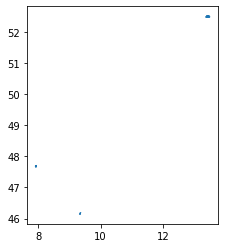

In [10]:
# Simple plot
track.plot()